In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle 
import statsmodels.api as sm

In [2]:
df = wrangle.acquire_store()
df.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


In [3]:
def prep_store(adf):
    adf['sale_date'] = pd.to_datetime(adf['sale_date'], infer_datetime_format = True)
    adf = adf.set_index('sale_date')
    adf = adf.sort_index()
    adf['month'] = adf.index.month_name()
    adf['day_of_week'] = adf.index.day_name()
    adf['sales_total'] = adf['sale_amount'] * adf['item_price']
    return adf

store_df = prep_store(df)

In [4]:
store_df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Tuesday,10.92
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,January,Tuesday,218.40
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,January,Tuesday,125.55
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,January,Tuesday,453.60
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,January,Tuesday,294.00


In [5]:
train_len = int(0.6 *len(store_df))
val_test_split = int(0.8 * len(store_df))
train_len, val_test_split

(547800, 730400)

In [6]:
train = store_df.iloc[:train_len]
val = store_df.iloc[train_len: val_test_split]
test = store_df.iloc[val_test_split:]
train.shape, val.shape, test.shape

((547800, 9), (182600, 9), (182600, 9))

In [7]:
train.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Tuesday,10.92
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,January,Tuesday,218.40
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,January,Tuesday,125.55
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,January,Tuesday,453.60
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,January,Tuesday,294.00


<AxesSubplot:xlabel='store_zipcode'>

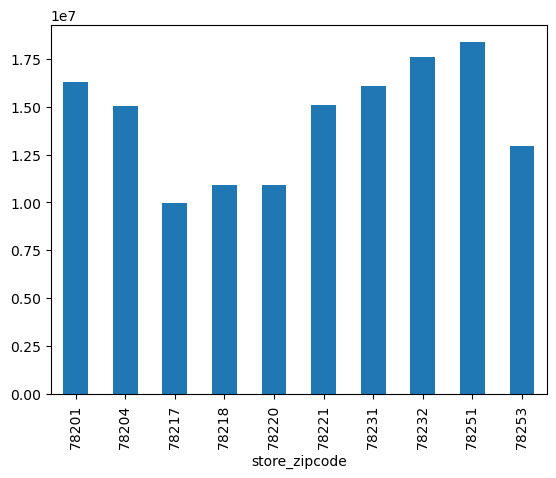

In [8]:
train.groupby('store_zipcode')['sales_total'].sum().plot.bar()

<AxesSubplot:xlabel='item_brand'>

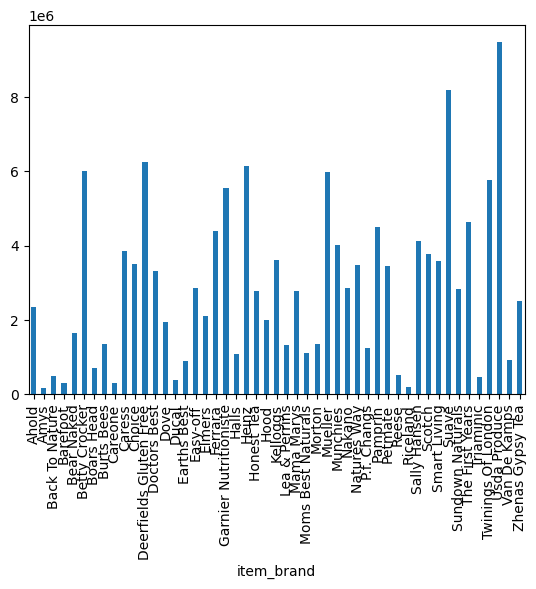

In [9]:
train.groupby('item_brand')['sales_total'].sum().plot.bar()

<AxesSubplot:xlabel='sale_date'>

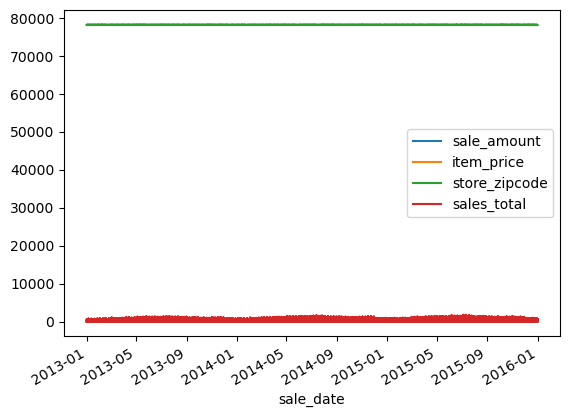

In [10]:
train.plot()

<AxesSubplot:xlabel='sale_date'>

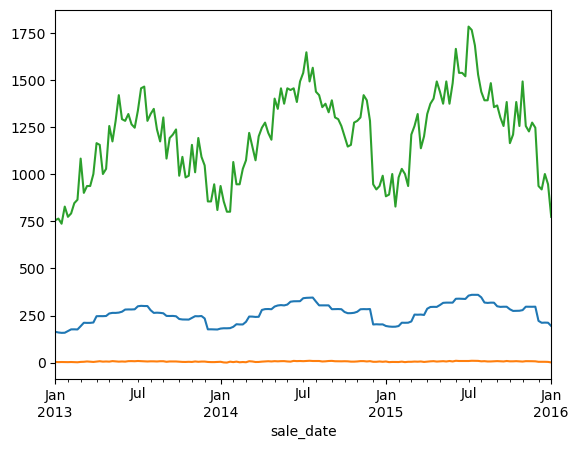

In [13]:
train.resample('w').mean()['sales_total'].plot()
train.resample('w').min()['sales_total'].plot()
train.resample('w').max()['sales_total'].plot()

In [17]:
train.groupby([train.index.year, train.index.month]).mean().unstack(0)

sale_amount                                  item_price          \
sale_date        2013       2014       2015       2016       2013    2014   
sale_date                                                                   
1           29.348645  33.934645  35.646000  39.483333     5.1604  5.1604   
2           32.815500  37.794071  39.379786        NaN     5.1604  5.1604   
3           39.831097  45.438774  47.158129        NaN     5.1604  5.1604   
4           45.484933  52.594267  54.964467        NaN     5.1604  5.1604   
5           49.241419  56.959806  59.800129        NaN     5.1604  5.1604   
6           53.039800  60.456133  62.478933        NaN     5.1604  5.1604   
7           55.220774  63.807097  66.925806        NaN     5.1604  5.1604   
8           49.468452  57.135226  59.380710        NaN     5.1604  5.1604   
9           45.993800  52.341600  54.888800        NaN     5.1604  5.1604   
10          42.360452  48.960194  51.435677        NaN     5.1604  5.1604   
11          46.176200  53.385533  55.176333        NaN     5.1604  5.1604   
12          32.684323  37.293419  39.198194        NaN     5.1604  5.1604   

                            store_zipcode                              \
sale_date    2015      2016          2013     2014     2015      2016   
sale_date                                                               
1          5.1604  5.169167       78224.8  78224.8  78224.8  78223.38   
2          5.1604       NaN       78224.8  78224.8  78224.8       NaN   
3          5.1604       NaN       78224.8  78224.8  78224.8       NaN   
4          5.1604       NaN       78224.8  78224.8  78224.8       NaN   
5          5.1604       NaN       78224.8  78224.8  78224.8       NaN   
6          5.1604       NaN       78224.8  78224.8  78224.8       NaN   
7          5.1604       NaN       78224.8  78224.8  78224.8       NaN   
8          5.1604       NaN       78224.8  78224.8  78224.8       NaN   
9          5.1604       NaN       78224.8  78224.8  78224.8       NaN   
10         5.1604       NaN       78224.8  78224.8  78224.8       NaN   
11         5.1604       NaN       78224.8  78224.8  78224.8       NaN   
12         5.1604       NaN       78224.8  78224.8  78224.8       NaN   

          sales_total                                    
sale_date        2013        2014        2015      2016  
sale_date                                                
1          157.894723  182.410791  191.725206  208.5503  
2          176.411855  203.207122  211.589839       NaN  
3          214.181650  244.488991  253.739390       NaN  
4          244.460082  282.786091  295.147608       NaN  
5          264.663123  306.267538  321.813672       NaN  
6          285.261279  324.965376  335.850784       NaN  
7          296.881241  342.849100  359.698008       NaN  
8          266.183375  307.345466  319.435676       NaN  
9          247.237694  281.350430  295.088416       NaN  
10         227.868064  263.133772  276.572155       NaN  
11         248.108656  286.821036  296.583045       NaN  
12         175.753692  200.538977  210.886208       NaN

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

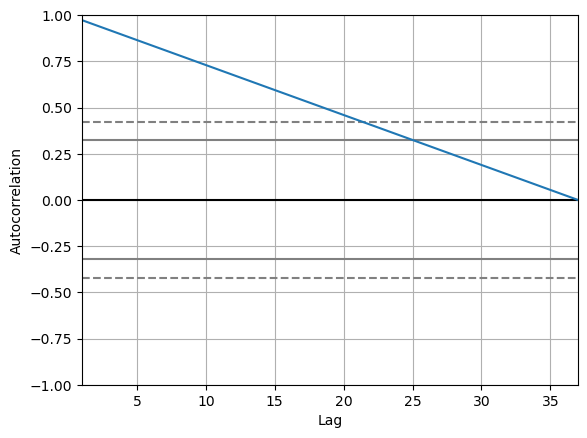

In [19]:
pd.plotting.autocorrelation_plot(train.resample('m').mean())

In [21]:
result = sm.tsa.filters.cf_filter.cffilter(train.resample('w').mean())

result.plot()
None

AttributeError: module 'statsmodels.tsa.filters.api' has no attribute 'cf_filter'